In [24]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 40)

from sklearn import preprocessing, neighbors, model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [6]:
df = pd.read_csv(os.path.join('datasets','dataset-06-storms.csv.gz'))

/Users/seanmcghee/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,9,10,11,12,16,17,27,28,29,30,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df.head(10)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,MOBILE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,14.0,100.0,3.0,0.0,0.0,15.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3040.0,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,BALDWIN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.0,150.0,2.0,0.0,0.0,0.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3042.0,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,FAYETTE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.1,123.0,2.0,0.0,0.0,2.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3340.0,8742.0,0.0,0.0,NaN,3.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,MADISON,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,100.0,2.0,0.0,0.0,2.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3458.0,8626.0,0.0,0.0,NaN,4.0
4,1.0,11/15/1951 0:00:00,1500,CST,43.0,CULLMAN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,150.0,2.0,0.0,0.0,2.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3412.0,8642.0,0.0,0.0,NaN,5.0
5,1.0,11/15/1951 0:00:00,2000,CST,77.0,LAUDERDALE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.5,177.0,2.0,0.0,0.0,6.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3450.0,8748.0,0.0,0.0,NaN,6.0
6,1.0,11/16/1951 0:00:00,100,CST,9.0,BLOUNT,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.5,33.0,2.0,0.0,0.0,1.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3405.0,8631.0,0.0,0.0,NaN,7.0
7,1.0,1/22/1952 0:00:00,900,CST,123.0,TALLAPOOSA,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,33.0,1.0,0.0,0.0,0.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3255.0,8558.0,0.0,0.0,NaN,8.0
8,1.0,2/13/1952 0:00:00,2000,CST,125.0,TUSCALOOSA,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,3.3,100.0,3.0,0.0,1.0,14.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3334.0,8740.0,3336.0,8738.0,NaN,9.0
9,1.0,2/13/1952 0:00:00,2000,CST,57.0,FAYETTE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.3,100.0,3.0,0.0,0.0,0.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3336.0,8738.0,3337.0,8737.0,NaN,10.0


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
STATE__,902297.0,31.200958,16.570178,1.0,19.0,30.0,45.0,95.0
COUNTY,902297.0,100.642905,107.276509,0.0,31.0,75.0,131.0,873.0
BGN_RANGE,902297.0,1.483889,5.481574,0.0,0.0,0.0,1.0,3749.0
COUNTY_END,902297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
COUNTYENDN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
END_RANGE,902297.0,0.986198,3.374106,0.0,0.0,0.0,0.0,925.0
LENGTH,902297.0,0.230130,4.617236,0.0,0.0,0.0,0.0,2315.0
WIDTH,902297.0,7.503044,61.571363,0.0,0.0,0.0,0.0,4400.0
F,58734.0,0.914990,1.002292,0.0,0.0,1.0,1.0,5.0
MAG,902297.0,46.899832,61.913304,0.0,0.0,50.0,75.0,22000.0


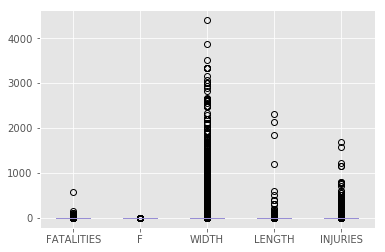

In [19]:
df[ ['FATALITIES','F','WIDTH','LENGTH','INJURIES'] ].boxplot(figsize = (8, 8))

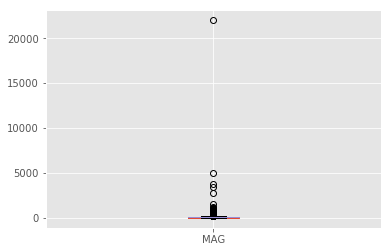

In [18]:
df[ ['MAG'] ].boxplot(figsize = (8, 8))  # lots of outliers in MAG

In [53]:
df[(df.FATALITIES > 0)|(df.PROPDMG > 0)|(df.CROPDMG > 0)|(df.INJURIES > 0)].EVTYPE.value_counts()

TSTM WIND                         63234
THUNDERSTORM WIND                 43655
TORNADO                           39944
HAIL                              26130
FLASH FLOOD                       20967
LIGHTNING                         13293
THUNDERSTORM WINDS                12086
FLOOD                             10175
HIGH WIND                          5522
STRONG WIND                        3370
WINTER STORM                       1508
HEAVY SNOW                         1342
HEAVY RAIN                         1105
WILDFIRE                            857
ICE STORM                           708
URBAN/SML STREAM FLD                702
EXCESSIVE HEAT                      698
HIGH WINDS                          657
TSTM WIND/HAIL                      441
TROPICAL STORM                      416
WINTER WEATHER                      407
RIP CURRENT                         400
WILD/FOREST FIRE                    388
FLASH FLOODING                      302
FLOOD/FLASH FLOOD                   279


In [55]:
# give this function the evtype column to clean it up into the main event type categories

def clean_up_evtype(column):
    if column.upper().find("SUMMARY") != -1:
        return np.nan
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'LANDSLIDE':
        return "AVALANCHE"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'EXTREME WINDCHILL':
        return "COLD/WIND CHILL"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'HEAT':
        return "EXCESSIVE HEAT"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'DRY MICROBURST':
        return "EXCESSIVE HEAT"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'FLASH FLOODING':
        return "FLASH FLOOD"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'URBANSML STREAM FLD':
        return "FLOOD"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'COASTAL FLOOD':
        return "FLOOD"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'FLOODFLASH FLOOD':
        return "FLOOD"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'URBAN FLOOD':
        return "FLOOD"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'RIVER FLOOD':
        return "FLOOD"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'SNOW':
        return "HEAVY SNOW"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'HEAVY SURFHIGH SURF':
        return "HIGH SURF"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'STRONG WIND':
        return "HIGH WIND"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'HIGH WINDS':
        return "HIGH WIND"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'HURRICANE':
        return "HURRICANE/TYPHOON"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'MARINE TSTM WIND':
        return "MARINE THUNDERSTORM WIND"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'RIP CURRENTS':
        return "RIP CURRENTS"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'FREEZING RAIN':
        return "SLEET"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'STORM SURGE':
        return "STORM TIDE"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'WIND':
        return "STRONG WIND"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'STRONG WINDS':
        return "STRONG WIND"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'TSTM WIND':
        return "THUNDERSTORM WIND"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'THUNDERSTORM WINDS':
        return "THUNDERSTORM WIND"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'TSTM WINDHAIL':
        return "THUNDERSTORM WIND"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'THUNDESTORM WINDS':
        return "THUNDERSTORM WIND"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'TSTM WINDHAIL':
        return "THUNDERSTORM WIND"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'WILDFOREST FIRE':
        return "WILDFIRE"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'WINTER WEATHERMIX':
        return "WINTER WEATHER"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'HURRICANETYPHOON':
        return "HURRICANE/TYPHOON"
    elif column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789') == 'TSTM WIND (G)':
        return "THUNDERSTORM WIND"
    else:
        return column.upper().replace("/","").strip().replace(".","").translate(None, '0123456789')
    
print df[(df.FATALITIES > 0)|(df.PROPDMG > 0)|(df.CROPDMG > 0)|(df.INJURIES > 0)].EVTYPE.apply(clean_up_evtype).value_counts()

THUNDERSTORM WIND                 119422
TORNADO                            39944
HAIL                               26130
FLASH FLOOD                        21271
LIGHTNING                          13294
FLOOD                              11570
HIGH WIND                           9552
WINTER STORM                        1508
HEAVY SNOW                          1396
WILDFIRE                            1245
HEAVY RAIN                          1105
EXCESSIVE HEAT                       991
ICE STORM                            708
WINTER WEATHER                       546
AVALANCHE                            461
TROPICAL STORM                       416
RIP CURRENT                          400
DROUGHT                              266
BLIZZARD                             253
RIP CURRENTS                         241
EXTREME COLD                         199
LAKE-EFFECT SNOW                     194
HIGH SURF                            186
STORM TIDE                           177
MARINE THUNDERST

In [56]:
df['EVTYPE'].apply(clean_up_evtype).value_counts()

THUNDERSTORM WIND                 324388
HAIL                              288661
TORNADO                            60652
FLASH FLOOD                        54961
FLOOD                              30425
HIGH WIND                          25317
HEAVY SNOW                         16325
LIGHTNING                          15756
MARINE THUNDERSTORM WIND           11987
HEAVY RAIN                         11742
WINTER STORM                       11433
WINTER WEATHER                      8149
FUNNEL CLOUD                        6845
WILDFIRE                            4218
WATERSPOUT                          3798
BLIZZARD                            2719
EXCESSIVE HEAT                      2631
DROUGHT                             2488
ICE STORM                           2006
FROSTFREEZE                         1343
DENSE FOG                           1293
EXTREME COLDWIND CHILL              1002
AVALANCHE                            986
HIGH SURF                            962
TROPICAL STORM  